# Clustering (Agrupación)

* El agrupamiento es un tipo de aprendizaje no supervisado, es decir en dónde los datos de entrenamiento no tienen etiquetas.
* La tarea es encontrar "agrupaciones naturales" de los datos
* La importancia práctica de este tipo de técnica, es que es el primer paso en el análisis exploratorio de datos.
* Tiene algunas variantes:
  - Grupos "exclusivos"
  - Grupos "compartidos"
  - Membresia de grupo probabilística
  
## Clustering k-means

1. Definir el número de grupos __k__
2. Elegir aleatoriamente __k__ puntos como centro de l clusters.
3. Para cada instancia del conjunto de entramiento, asignarla en el cluster del cual esté mas cerca a su centro.
4. Si no hay cambio en ningún cluster PARAR
5. Recalcular los centroides( Cada atributo del centroide, es el promedio de los valores de ese atributo para todas las entidades del cluster)
6. Ir al paso 3

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

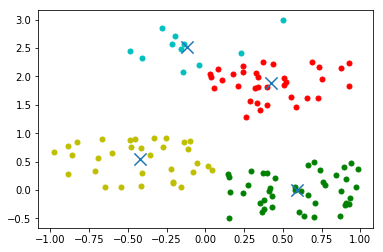

In [11]:
X1 = np.random.rand(30, 2) + [-1, 0];
X2 = np.random.rand(30, 2) + [0, 1.25];
X3 = np.random.rand(15, 2) + [-0.5, 2];
X4 = np.random.rand(45, 2) + [0.0, -0.5];

X = np.vstack([X1, X2, X3, X4])

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#print(centroids)
#print(labels)
colors = ["g.","r.","c.","y.", "b.", "m."]

for i in range(len(X)):
    #print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

## Algoritmo paso a paso

<img src="img/ckm1.png" alt="Datos iniciales" style="width: 500px;"/>
![title](img/ckm2.png "Centros alatorios iniciales")
![title](img/ckm3.png "5 vecinos más cercanos")
![title](img/ckm4.png "5 vecinos más cercanos")

Ahora probemos con un ejemplo mucho mas complicado. Que pasa si en lugar de simples números aleatorios, usamos el conjunto de pruebas de los dígitos

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.30s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.25s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.04s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


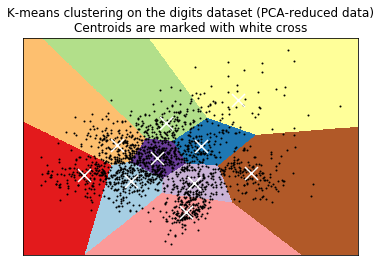

In [9]:
#sudo dnf install numpy scipy python-matplotlib ipython python-pandas sympy python-nose atlas-devel

print(__doc__)

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Algunas consideraciones

* Cuando k-means termina la suma de todas las distancias de los puntos a los centros de sus grupos es mínima.
* Esta minimización es solo local, ya que depende de k y de los valores iniciales de los centroides.
* La eficiencia de este algoritmo es: O(#iteraciones * k * N)
* kD-tress pueden ser usados para mejorar el desempeño
* k-medoids vs k-means (Sensibilidad a valores atípicos)
  - Ejemplo: {1, 2, 3, 8, 9, 10, 25}
  - K-medoids {1, 2, 3}, {8, 9, 10, 25}
  - K-means {1, 2, 3, 10}, {9, 10, 25}


## Elegir un buen valor de __k__ usando el método del codo

Cómo podemos ver, k-means es un método simple que requiere de pocos parámetros de usuario para trabajar. Sin embargo, el método divide siempre el conjunto en __k__ grupos, aún si este no es número correcto de grupos en el conjunto. Algunas veces el usuario sabe de antemano cuantos grupos espera en su conjunto, pero muchas otras veces no, entonces necesitamos una forma de encontrar este valor usando lo que tenemos a mano.

Uno de los métodos para seleccionar este valor es por medio del __método del codo__(Elbow method). 
* Correr k-means en el conjunto de datos, con k variando en un cierto rango, (digamos entre 1 y 10) como en nuestro ejemplo artificial.
* Para cada valor de __k__ calcular la suma de los errores cuadráticos(SSE)

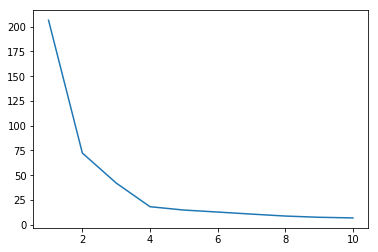

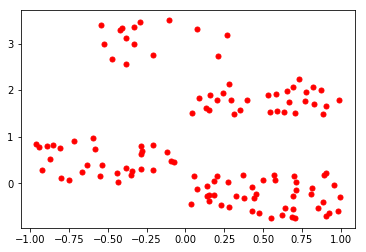

In [52]:
X1 = np.random.rand(30, 2) + [-1, 0];
X2 = np.random.rand(30, 2) + [0, 1.25];
X3 = np.random.rand(15, 2) + [-0.7, 2.5];
X4 = np.random.rand(45, 2) + [0.0, -0.75];

X = np.vstack([X1, X2, X3, X4])
krange = range(1, 11)
inertia = []
for k in krange:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(krange, inertia)
plt.show()

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], "r.", markersize = 10)
plt.show()

http://scikit-learn.org/stable/modules/clustering.html